## Observations and Insights 

In [1]:
# %matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset and display data
combined_data_df = pd.merge(mouse_metadata_df, study_results_df)
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# #group based on value:'Mouse ID'
mouse_id = combined_data_df.groupby('Mouse ID')

In [5]:
#count number of mice in 'Mouse ID'
unclean_count_mice = mouse_id['Mouse ID'].count()
unclean_count_mice.count()

249

In [6]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
duplicate_ids = combined_data_df.loc[combined_data_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].nunique()
duplicate_ids

1

In [7]:
#data from mouse id= g989
clean_count_mouse = combined_data_df.loc[combined_data_df["Mouse ID"] != "g989",:]
clean_count_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
#clean mouse data
len(clean_count_mouse["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
measurement_count = combined_data_df.groupby('Drug Regimen').count()["Mouse ID"]
mean = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sem = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
standard_dv = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

summary_df = pd.DataFrame({"Mouse ID": measurement_count,
                            "Mean Tumor Volume": mean, 
                           "Median Tumor Volume": median,
                           "Tumor Volume Variance": variance,
                          "Tumor Volume Std. Dev.": standard_dv,
                          "Tumor Volume SEM": sem})
summary_df
summary_df.head()

,Mouse ID,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

In [10]:
#barplot
#list for drug list ( x-axis)
drug_list = summary_df.index.tolist()
drug_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

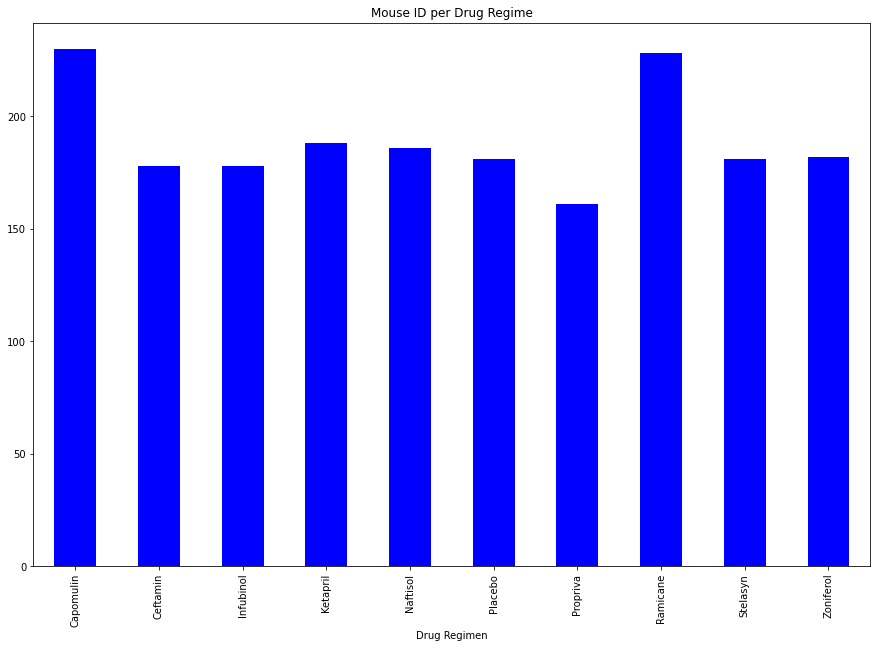

<Figure size 432x288 with 0 Axes>

In [11]:
#barplot
datapoints = summary_df[["Mouse ID"]]
datapoints

datapoints.plot(kind="bar", figsize=(15,10), color = "b", legend=False)
plt.title('Mouse ID per Drug Regime')
plt.show()
plt.tight_layout()

In [12]:
#matplotlib graph

In [13]:
drug_regimen = ["Capomulin", "Ceftamin","Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
drug_regimen
mouse_count = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
mouse_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

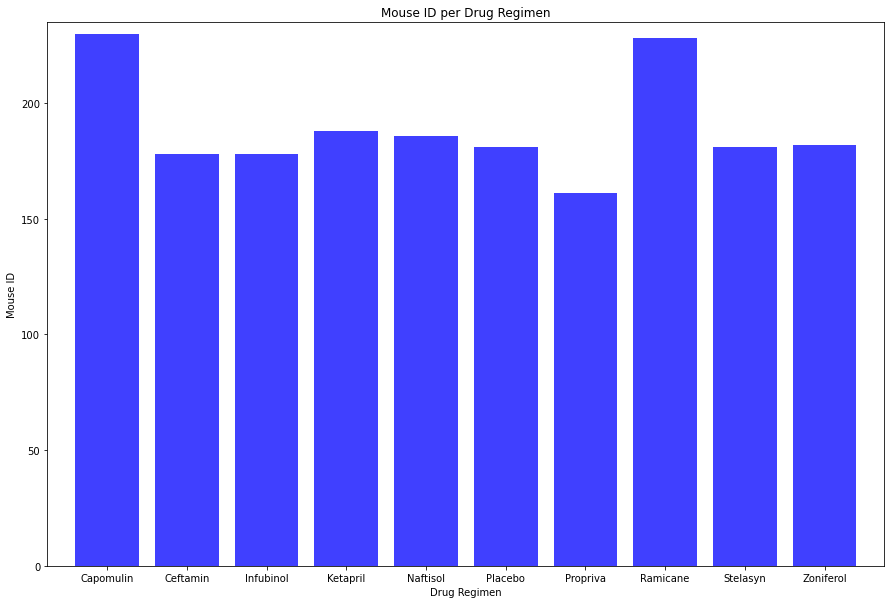

In [14]:
x_axis = np.arange(0, len(drug_regimen))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.figure(figsize=(15,10))
plt.bar(x_axis, mouse_count, color='b', alpha=0.75, align="center")
plt.title("Mouse ID per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse ID")

plt.xlim(-0.75, len(drug_regimen)-.25)
plt.ylim(0, max(mouse_count) + 5)


plt.xticks(tick_locations, drug_regimen)
plt.show()

In [15]:
#Pie Plot with Panda that shows gender

In [16]:
#drop duplicate values of genders within mouse id
unique_gender_df = clean_count_mouse.drop_duplicates(subset='Mouse ID', keep='first')
unique_gender_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [17]:
sex_counts = unique_gender_df.Sex.value_counts()
sex_counts

Male      125
Female    123
Name: Sex, dtype: int64

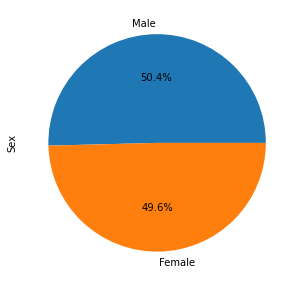

In [18]:
# Generate a pie plot using both Pandas's that shows the distribution of female or male mice in the study.
plt.figure(figsize=(7,5))
pie=sex_counts.plot(kind="pie",autopct='%1.1f%%')
plt.show(pie)

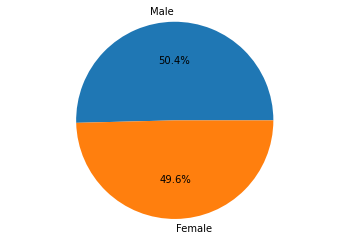

In [19]:
# Generate a pie plot using both Matplotlib's that shows the distribution of female or male mice in the study.
sex = ["Male", "Female"]
sex_distribution = [125, 123]

plt.pie(sex_distribution, labels=sex, autopct="%1.1f%%")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
best_regimes = combined_data_df[combined_data_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes

best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_regimes_data

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

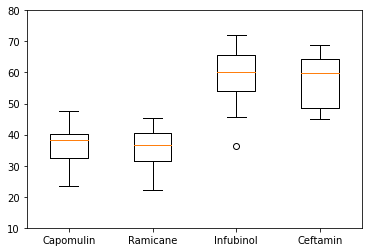

In [21]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.
best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()

# Turn data into dataframe to easily manipulate
best_regimen_df = best_regimens_sort.to_frame()
best_regimen_df

#Create a list to use as labels and df
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

#Create a box plot of the final tumor volume of each mouse across 4 regimens of interest
final_df = best_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

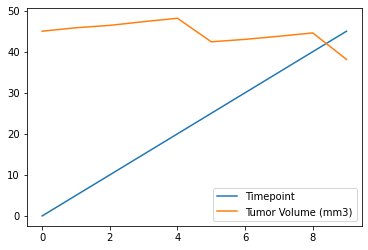

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
time_vs_tumer = combined_data_df[combined_data_df["Mouse ID"].isin(["j119"])]
time_vs_tumer

time_vs_tumer_data = time_vs_tumer[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumer_data

line_plot_df = time_vs_tumer_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()

<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

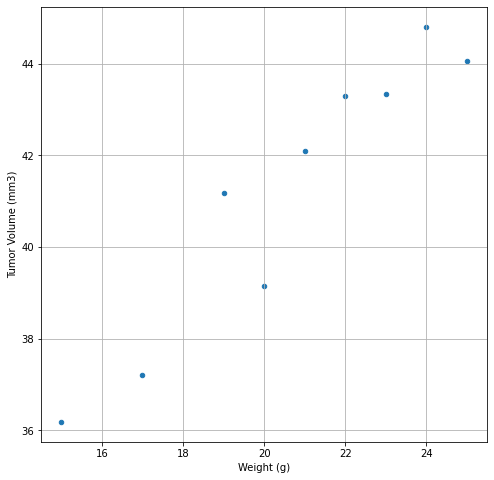

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
capomulin_scatter = combined_data_df[combined_data_df["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter_df = best_regimes[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capomulin_sorted = capomulin_scatter.sort_values(["Weight (g)"], ascending=True)

capomulin_scatter_plot = capomulin_scatter.reset_index()
capomulin_scatter_plot

capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()

capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))
capomulin_scatter


## Correlation and Regression

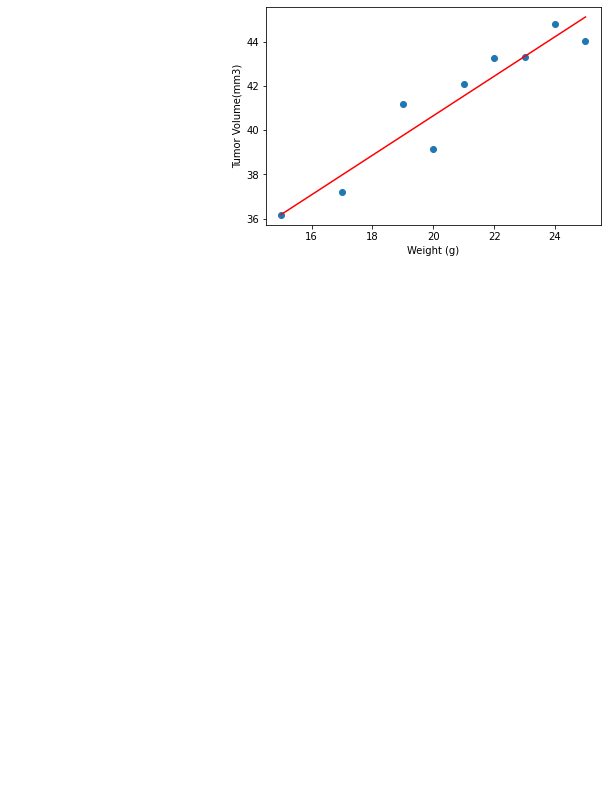

In [26]:
x_values = capo_grouped_plot['Weight (g)']
y_values = capo_grouped_plot['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume(mm3)')
plt.show()


The r-squared is: 0.9034966277438606


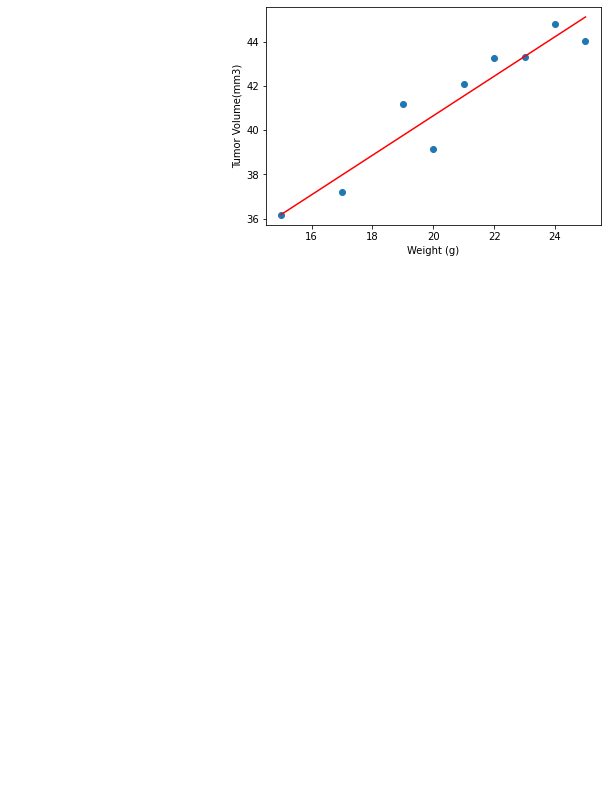

In [25]:
# Print out the r-squared value along with the plot.
x_values = capo_grouped_plot['Weight (g)']
y_values = capo_grouped_plot['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume(mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Observations and Insights